In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('Housing.csv')
data

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1465896,244316,593,412,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,3123904,390488,734,532,4,4,4,yes,no,no,no,yes,3,no,furnished
2,1519896,379974,498,763,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,1152112,288028,382,754,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,887292,221823,503,441,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,377880,188940,470,402,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,483084,241542,497,486,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,364276,182138,374,487,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,734160,367080,570,644,3,1,1,no,no,no,no,no,0,no,furnished


#### Apply univariate analysis on a feature in the given dataset

In [3]:
mean = data['price'].mean()
mean

1058779.8678899081

In [4]:
median = data['price'].median()
median

907584.0

In [5]:
std = data['price'].std()
std

667148.2157118549

In [6]:
from scipy import stats

stats.zscore(data['price'])

0      0.610794
1      3.098294
2      0.691810
3      0.140026
4     -0.257282
         ...   
540   -1.021550
541   -0.863713
542   -1.041960
543   -0.487025
544    0.849899
Name: price, Length: 545, dtype: float64

#### Use any classifier on the data

In [7]:
from sklearn.preprocessing import LabelEncoder

encoding_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating','airconditioning', 'prefarea', 'furnishingstatus']

data[encoding_columns] = data[encoding_columns].apply(LabelEncoder().fit_transform)
data

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1465896,244316,593,412,4,2,3,1,0,0,0,1,2,1,0
1,3123904,390488,734,532,4,4,4,1,0,0,0,1,3,0,0
2,1519896,379974,498,763,3,2,2,1,0,1,0,0,2,1,1
3,1152112,288028,382,754,4,2,2,1,0,1,0,1,3,1,0
4,887292,221823,503,441,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,377880,188940,470,402,2,1,1,1,0,1,0,0,2,0,2
541,483084,241542,497,486,3,1,1,0,0,0,0,0,0,0,1
542,364276,182138,374,487,2,1,1,1,0,0,0,0,0,0,2
543,734160,367080,570,644,3,1,1,0,0,0,0,0,0,0,0


In [8]:
from sklearn.model_selection import train_test_split

X = data.drop('furnishingstatus',axis=1)
y = data['furnishingstatus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


gnb = GaussianNB()
gnb.fit(X_train, y_train)
predictions = gnb.predict(X_test)

accuracy_score(y_test, predictions) * 100

36.69724770642202

#### Normalize the data using techniques learned in the class and feed the data to any classifier. 

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaling_columns = data[['price', 'area', 'length','width']]

scaled = scaler.fit_transform(scaling_columns)
df = pd.DataFrame(data = scaled, columns=["price","area","length",'width'])

In [11]:
for i in df.columns:
     data[i] = df[i]

In [12]:
data

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.287069,0.288093,0.586,0.224,4,2,3,1,0,0,0,1,2,1,0
1,0.663195,0.569795,0.868,0.464,4,4,4,1,0,0,0,1,3,0,0
2,0.299319,0.549533,0.396,0.926,3,2,2,1,0,1,0,0,2,1,1
3,0.215885,0.372335,0.164,0.908,4,2,2,1,0,1,0,1,3,1,0
4,0.155810,0.244745,0.406,0.282,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.040247,0.181372,0.340,0.204,2,1,1,1,0,1,0,0,2,0,2
541,0.064113,0.282747,0.394,0.372,3,1,1,0,0,0,0,0,0,0,1
542,0.037161,0.168264,0.148,0.374,2,1,1,1,0,0,0,0,0,0,2
543,0.121071,0.524684,0.540,0.688,3,1,1,0,0,0,0,0,0,0,0


#### Evaluate your results, was normalization helpful? If yes then which one outperformed rest and why?

In [13]:
from sklearn.model_selection import train_test_split

X_scale = data.drop('furnishingstatus',axis=1)
y_scale = data['furnishingstatus']

X_train_scale, X_test_scale, y_train_scale, y_test_scale = train_test_split(X_scale, y_scale, test_size=0.20, random_state=42)

In [14]:
gnb = GaussianNB()
gnb.fit(X_train_scale, y_train_scale)
predictions_scale = gnb.predict(X_test_scale)

accuracy_score(y_test_scale, predictions_scale) * 100

44.03669724770643

In [15]:
# Normalization was extremely helpful and it outperformed the old results because it reduced data points to range 0-1

#### Plot the area w.r.t to its independent variables in 2D and 3D 

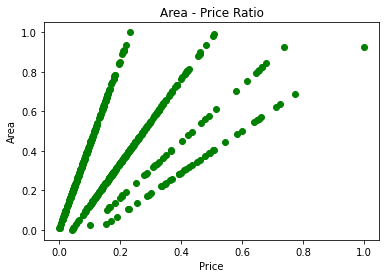

In [16]:
import matplotlib.pyplot as plt

x_axis = data['price']
y_axis = data['area']

plt.scatter(x_axis, y_axis ,c="g")
plt.title('Area - Price Ratio')

plt.xlabel('Price')
plt.ylabel('Area')

plt.show()

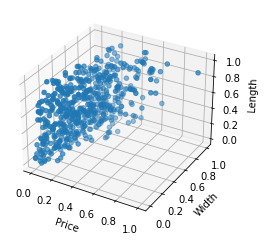

In [17]:
fig = plt.figure()

ax = fig.add_subplot(projection='3d')
ax.scatter(data["price"], data["width"], data["length"])

ax.set_xlabel('Price')
ax.set_ylabel('Width')
ax.set_zlabel('Length')

plt.show()

#### Find the covariance &amp; correlation matrix of the normalized data

In [18]:
data.cov()

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,0.022906,0.020038,0.019557,0.017820,0.037506,0.021006,0.097208,0.003696,0.002196,-0.012477,0.000444,0.015832,-0.007205,0.000530,-0.011191
area,0.020038,0.047448,0.044980,0.042667,0.005443,0.004682,-0.000091,-0.004424,-0.000327,-0.005379,0.000157,-0.001547,-0.023454,-0.004157,-0.004181
length,0.019557,0.044980,0.088036,-0.001806,0.015686,0.006043,0.002222,-0.005035,0.003135,-0.002691,-0.003226,0.012609,-0.007975,0.000598,-0.000004
width,0.017820,0.042667,-0.001806,0.083608,-0.000140,0.004671,0.001580,-0.002583,-0.004354,-0.007210,0.003076,-0.012196,-0.033321,-0.009220,-0.007908
bedrooms,0.037506,0.005443,0.015686,-0.000140,0.544738,0.138674,0.261589,-0.003096,0.022760,0.034299,0.007117,0.055140,0.088562,0.024747,-0.069256
bathrooms,0.021006,0.004682,0.006043,0.004671,0.138674,0.252476,0.142171,0.007427,0.024329,0.024501,0.007066,0.043689,0.076842,0.013532,-0.054921
stories,0.097208,-0.000091,0.002222,0.001580,0.261589,0.142171,0.752543,0.036809,0.014460,-0.071418,0.003424,0.118480,0.034043,0.016352,-0.069135
mainroad,0.003696,-0.004424,-0.005035,-0.002583,-0.003096,0.007427,0.036809,0.121546,0.012325,0.007326,-0.000860,0.017097,0.061407,0.029567,-0.041601
guestroom,0.002196,-0.000327,0.003135,-0.004354,0.022760,0.024329,0.014460,0.012325,0.146573,0.068025,-0.000826,0.024609,0.012358,0.026137,-0.034491
basement,-0.012477,-0.005379,-0.002691,-0.007210,0.034299,0.024501,-0.071418,0.007326,0.068025,0.228056,0.000438,0.010517,0.021189,0.046216,-0.041025


In [19]:
data.corr()

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.607827,0.435523,0.407210,0.335762,0.276222,0.740398,0.070040,0.037897,-0.172628,0.014013,0.224880,-0.055252,0.008255,-0.097114
area,0.607827,1.000000,0.695952,0.677425,0.033856,0.042773,-0.000482,-0.058259,-0.003926,-0.051712,0.003432,-0.015263,-0.124971,-0.044978,-0.025209
length,0.435523,0.695952,1.000000,-0.021047,0.071629,0.040536,0.008633,-0.048675,0.027602,-0.018991,-0.051918,0.091354,-0.031198,0.004749,-0.000019
width,0.407210,0.677425,-0.021047,1.000000,-0.000656,0.032149,0.006299,-0.025620,-0.039328,-0.052216,0.050802,-0.090670,-0.133752,-0.075153,-0.035919
bedrooms,0.335762,0.033856,0.071629,-0.000656,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.276222,0.042773,0.040536,0.032149,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.740398,-0.000482,0.008633,0.006299,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.070040,-0.058259,-0.048675,-0.025620,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.037897,-0.003926,0.027602,-0.039328,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,-0.172628,-0.051712,-0.018991,-0.052216,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831


#### Find the correlation of length and area and plot it,.

In [20]:
correlation = data[['length' , 'area']]

correlation = correlation.corr()

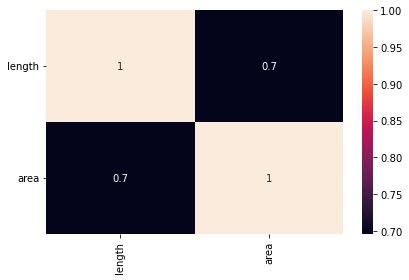

In [21]:
import seaborn as sns

sns.heatmap(correlation , annot=True)

plt.yticks(rotation=0)  
plt.xticks(rotation=90)  

plt.tight_layout()
plt.show()

#### Assuming 3 friends have 5 cities (A,B,C,D,E) to go to, what is the possible state space of this problem? Display the possible state space in a proper way. I&#39;m interested in the random variable where 2 person go to the same city.

#### Find the probability of the occurrence of that event 

In [22]:
friends = []
alphabets = ['A','B','C','D','E']

for i in alphabets:
    for j in alphabets:
        for k in alphabets:
            
            combination = i + j + k
            friends.append(combination)
            
len(friends)

125

In [23]:
same_city = 0
all_different_city = 0

for i in friends:
    
    if (i[0] == i[1]) or (i[0] == i[2]) or (i[1] == i[2]):
            same_city += 1
    if (i[0] != i[1]) and (i[0] != i[2]) and (i[1] != i[2]):
        all_different_city += 1

In [24]:
probability_same_city = same_city/len(friends)
probability_same_city

0.52

In [25]:
probability_different_city = all_different_city/len(friends)
probability_different_city

0.48

#### Plot the probability distribution

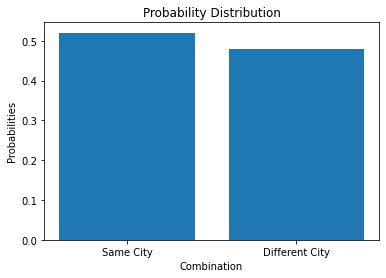

In [26]:
import matplotlib.pyplot as plt
   
city = ['Same City','Different City']

probability = []
probability.append(probability_same_city)
probability.append(probability_different_city)

plt.bar(city, probability)

plt.title('Probability Distribution')
plt.xlabel('Combination')
plt.ylabel('Probabilities')

plt.show()

#### Is it a discrete distribution or a continuous one?

In [27]:
# It is a descrete distribution

#### Is it univariate or a multivariate problem?

In [28]:
# It is a multivariate problem